### 动量因子在Top50市值Crypto的表现
### Performance of Momentum Factor in top50 market share cryptos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from binance.client import Client

In [2]:
# ak = #input your api
# sk = #input your secret key
# client = Client(ak,sk)

In [3]:
def get_historical_fu_data(symbol, interval,start_str,end_str):
    df = pd.DataFrame(client.futures_historical_klines(
        symbol=symbol,
        interval=interval,  # can play with this e.g. '1h', '4h', '1w', etc.
        start_str= start_str, #'2020-06-01'
        end_str= end_str
    ))
    df = df.iloc[:,[0,1,2,3,4,5,8]]
    df.columns = ['date', 'open', 'high', 'low', 'close', 'volume','#oftrade']
    # convert timestamp to date format and ensure ohlcv are all numeric
    df['date'] = pd.to_datetime(df['date'], unit='ms')
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col])
    return df

def get_data_summary(crypto_list,interval,start_str,end_str):
    crypto_summary={}
    for crypto in crypto_list:
        historical_data = get_historical_fu_data(crypto,interval,start_str,end_str)
        crypto_summary[f'{crypto}'] = historical_data
    return crypto_summary

In [4]:
crypto_list_mark = ['BTCUSDT','ETHUSDT','BNBUSDT','XRPUSDT','SOLUSDT','ADAUSDT','TRXUSDT','LINKUSDT','MATICUSDT','DOTUSDT','AVAXUSDT','LTCUSDT','BCHUSDT','UNIUSDT','XLMUSDT','XMRUSDT','ATOMUSDT','FILUSDT','HBARUSDT','ICPUSDT','LDOUSDT','APTUSDT','VETUSDT','NEARUSDT','QNTUSDT','OPUSDT','ARBUSDT','AAVEUSDT','GRTUSDT','MKRUSDT','EGLDUSDT','ALGOUSDT','STXUSDT','SANDUSDT','AXSUSDT']

In [5]:
# crypto_data = get_data_summary(crypto_list=crypto_list_mark,interval='1d',start_str='2019-01-01',end_str='2023-11-27')

In [6]:
# crypto_data

In [7]:
# store_data(crypto_data,conn=conn)

In [8]:
import sqlite3
import pandas as pd

# 创建一个连接
def create_connection(db_file):
    conn = None;
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
    return conn

def store_data(crypto_summary, conn):
    for crypto, df in crypto_summary.items():
        df.to_sql(crypto, conn, if_exists='replace')

def load_data(crypto_list, conn):
    crypto_summary = {}
    for crypto in crypto_list:
        df = pd.read_sql_query(f'SELECT * from {crypto}', conn,index_col='index')
        crypto_summary[crypto] = df
    return crypto_summary

def update_data(crypto_list, interval, start_str,end_str, conn):
    for crypto in crypto_list:
        # 只获取一天的数据
        new_df = get_historical_fu_data(crypto, interval, start_str, end_str)
        
        # 读取旧的数据
        old_df = pd.read_sql_query(f'SELECT * from {crypto}', conn,index_col='index')
        new_df['date'] = pd.to_datetime(new_df['date'])
        old_df['date'] = pd.to_datetime(old_df['date'])
        # 将新的数据添加到旧的数据中
        combined_df = pd.concat([old_df, new_df]).sort_values('date').drop_duplicates(subset='date', keep='last')
        
        
        combined_df = combined_df.reset_index(drop=True)
        print(combined_df)
        # 将更新的数据存储到数据库中
        combined_df.to_sql(crypto, conn, if_exists='replace')

In [9]:
# 创建一个连接
conn = sqlite3.connect('Top50_OHLCV.db')

In [10]:
# update_data(crypto_list=crypto_list_mark,interval='1d',start_str='2023-11-21',end_str='2023-11-27',conn=conn)

In [11]:
crypto_dfs = load_data(crypto_list_mark,conn=conn)
crypto_dfs

{'BTCUSDT':                       date      open      high       low     close  \
 index                                                                
 0      2019-09-08 00:00:00  10000.00  10412.65  10000.00  10391.63   
 1      2019-09-09 00:00:00  10316.62  10475.54  10077.22  10307.00   
 2      2019-09-10 00:00:00  10307.00  10382.97   9940.87  10102.02   
 3      2019-09-11 00:00:00  10094.27  10293.11   9884.31  10159.55   
 4      2019-09-12 00:00:00  10163.06  10450.13  10042.12  10415.13   
 ...                    ...       ...       ...       ...       ...   
 1537   2023-11-23 00:00:00  37413.50  37650.00  36856.30  37294.30   
 1538   2023-11-24 00:00:00  37294.40  38425.00  37257.30  37706.30   
 1539   2023-11-25 00:00:00  37706.30  37886.50  37570.90  37766.60   
 1540   2023-11-26 00:00:00  37766.70  37807.60  37126.00  37437.90   
 1541   2023-11-27 00:00:00  37437.90  37560.00  36700.00  37041.90   
 
            volume  #oftrade  
 index                        
 0

In [12]:
for crypto_name, crypto_df in crypto_dfs.items():
    crypto_df.set_index('date', inplace=True)

In [13]:
crypto_concat = pd.concat(crypto_dfs.values(), keys=crypto_dfs.keys(), names=['Crypto', 'Date'])
crypto_concat

open       high        low      close  \
Crypto  Date                                                              
BTCUSDT 2019-09-08 00:00:00  10000.000  10412.650  10000.000  10391.630   
        2019-09-09 00:00:00  10316.620  10475.540  10077.220  10307.000   
        2019-09-10 00:00:00  10307.000  10382.970   9940.870  10102.020   
        2019-09-11 00:00:00  10094.270  10293.110   9884.310  10159.550   
        2019-09-12 00:00:00  10163.060  10450.130  10042.120  10415.130   
...                                ...        ...        ...        ...   
AXSUSDT 2023-11-23 00:00:00      5.890      5.946      5.753      5.840   
        2023-11-24 00:00:00      5.839      6.060      5.811      5.948   
        2023-11-25 00:00:00      5.949      6.444      5.907      6.332   
        2023-11-26 00:00:00      6.333      6.950      6.155      6.702   
        2023-11-27 00:00:00      6.701      7.468      6.563      6.796   

                                   volume  #oftrade  
Crypto  Date                                         
BTCUSDT 2019-09-08 00:00:00  3.096291e+03      3754  
        2019-09-09 00:00:00  1.482437e+04     11296  
        2019-09-10 00:00:00  9.068955e+03     10089  
        2019-09-11 00:00:00  1.089792e+04     13811  
        2019-09-12 00:00:00  1.560963e+04     20060  
...                                   ...       ...  
AXSUSDT 2023-11-23 00:00:00  5.260434e+06    153186  
        2023-11-24 00:00:00  6.481114e+06    178803  
        2023-11-25 00:00:00  1.632394e+07    373269  
        2023-11-26 00:00:00  3.829253e+07    726703  
        2023-11-27 00:00:00  7.542337e+07   1421506  

[38280 rows x 6 columns]

In [14]:
# 计算20天动量因子
# Calculate 20 days Momentum Factor
period = 20
crypto_concat['MomentumFactor'] = crypto_concat.groupby('Crypto')['close'].pct_change(periods=period)

In [15]:
crypto_concat

open       high        low      close  \
Crypto  Date                                                              
BTCUSDT 2019-09-08 00:00:00  10000.000  10412.650  10000.000  10391.630   
        2019-09-09 00:00:00  10316.620  10475.540  10077.220  10307.000   
        2019-09-10 00:00:00  10307.000  10382.970   9940.870  10102.020   
        2019-09-11 00:00:00  10094.270  10293.110   9884.310  10159.550   
        2019-09-12 00:00:00  10163.060  10450.130  10042.120  10415.130   
...                                ...        ...        ...        ...   
AXSUSDT 2023-11-23 00:00:00      5.890      5.946      5.753      5.840   
        2023-11-24 00:00:00      5.839      6.060      5.811      5.948   
        2023-11-25 00:00:00      5.949      6.444      5.907      6.332   
        2023-11-26 00:00:00      6.333      6.950      6.155      6.702   
        2023-11-27 00:00:00      6.701      7.468      6.563      6.796   

                                   volume  #oftrade  MomentumFactor  
Crypto  Date                                                         
BTCUSDT 2019-09-08 00:00:00  3.096291e+03      3754             NaN  
        2019-09-09 00:00:00  1.482437e+04     11296             NaN  
        2019-09-10 00:00:00  9.068955e+03     10089             NaN  
        2019-09-11 00:00:00  1.089792e+04     13811             NaN  
        2019-09-12 00:00:00  1.560963e+04     20060             NaN  
...                                   ...       ...             ...  
AXSUSDT 2023-11-23 00:00:00  5.260434e+06    153186        0.074913  
        2023-11-24 00:00:00  6.481114e+06    178803        0.064233  
        2023-11-25 00:00:00  1.632394e+07    373269        0.106993  
        2023-11-26 00:00:00  3.829253e+07    726703        0.115327  
        2023-11-27 00:00:00  7.542337e+07   1421506        0.158936  

[38280 rows x 7 columns]

In [16]:
# 分层测试
# Stratified Testing
# 先排序
# Ordering First
crypto_concat['MomentumFactorRank'] = crypto_concat.groupby(level=1)['MomentumFactor'].rank(ascending=False)

# 根据排名分组
# Stratifying by groups
num_groups = 5  # Take 5 Groups
crypto_concat['MomentumFactorGroup'] = crypto_concat.groupby(level=1)['MomentumFactorRank'].transform(
    lambda x: pd.qcut(x.dropna(), q=num_groups, labels=False, duplicates='drop') if x.count() >= 2 else x-1
)

In [17]:
#看任意切片检查一下
#Check
crypto_concat.loc[crypto_concat.index.get_level_values('Date') == '2023-11-23 00:00:00']

,,open,high,low,close,volume,#oftrade,MomentumFactor,MomentumFactorRank,MomentumFactorGroup
Crypto,Date,,,,,,,,,
BTCUSDT,2023-11-23 00:00:00,37413.50000,37650.00000,36856.30000,37294.30000,1.853699e+05,2192283,0.074751,24.0,3.0
ETHUSDT,2023-11-23 00:00:00,2063.92000,2089.75000,2033.50000,2062.68000,2.101282e+06,1966699,0.125616,16.0,2.0
BNBUSDT,2023-11-23 00:00:00,236.39000,239.42000,230.30000,233.89000,1.573334e+06,797491,0.015148,27.0,3.0
XRPUSDT,2023-11-23 00:00:00,0.61130,0.62400,0.60610,0.62110,9.040379e+08,729081,0.014206,28.0,3.0
SOLUSDT,2023-11-23 00:00:00,57.57500,59.68800,56.12100,56.53700,2.897790e+07,1984309,0.431425,2.0,0.0
ADAUSDT,2023-11-23 00:00:00,0.38050,0.38750,0.37610,0.38740,3.758068e+08,327315,0.176792,10.0,1.0
TRXUSDT,2023-11-23 00:00:00,0.10113,0.10230,0.10073,0.10206,3.188021e+08,111414,0.050216,26.0,3.0
LINKUSDT,2023-11-23 00:00:00,14.21200,14.91500,14.12400,14.40200,2.984723e+07,820121,0.255404,7.0,0.0
MATICUSDT,2023-11-23 00:00:00,0.77280,0.78560,0.76400,0.77220,3.021000e+08,472387,0.148765,13.0,1.0


In [18]:
group_sizes = crypto_concat.groupby(['Date', 'MomentumFactorGroup']).size()
print("每个组的大小The Size for Each Group：")
print(group_sizes)

每个组的大小The Size for Each Group：
Date                 MomentumFactorGroup
2019-09-28 00:00:00  0.0                    1
2019-09-29 00:00:00  0.0                    1
2019-09-30 00:00:00  0.0                    1
2019-10-01 00:00:00  0.0                    1
2019-10-02 00:00:00  0.0                    1
                                           ..
2023-11-27 00:00:00  0.0                    7
                     1.0                    7
                     2.0                    7
                     3.0                    7
                     4.0                    7
Length: 7185, dtype: int64


In [19]:
# 得出来的因子在当天结束进行换手，当天因子应乘第二天收益率
# Turnover happens at the end of each day, we should use next day's return to evaluate todays Factor
crypto_concat['DailyReturn'] = crypto_concat.groupby('Crypto')['close'].pct_change().shift(-1)
# 为后续IC测试
# For latter IC test
crypto_concat['DailyReturnRank'] = crypto_concat.groupby(level=1)['DailyReturn'].rank(ascending=False)

In [20]:
# 创建一个字典，用于存储每个组的 DataFrame
# Make a dict, to store each groups daily return
groups = crypto_concat.groupby(['Date', 'MomentumFactorGroup'])
groupdfs={}
for i in range(num_groups):
    a = f'DailyReturn_{float(i)}'
    groupdfs[float(i)]=pd.DataFrame(columns=['Date',a])


# 遍历每个组，计算每个组的 Daily Return 的平均值，并存储到相应的 DataFrame 中
# calculate each group's Daily Return average, and store to corresponding DataFrame
for group, data in groups:
    groupnum = group[1]
    x = {'Date':[group[0]],
         f'DailyReturn_{group[1]}':[data['DailyReturn'].mean()]}
    newdf = pd.DataFrame(x)
    groupdfs[groupnum] = pd.concat([groupdfs[groupnum],newdf]).reset_index(drop=True)

groupdfs

{0.0:                      Date  DailyReturn_0.0
 0     2019-09-28 00:00:00        -0.018720
 1     2019-09-29 00:00:00         0.030326
 2     2019-09-30 00:00:00         0.000502
 3     2019-10-01 00:00:00         0.007496
 4     2019-10-02 00:00:00        -0.015789
 ...                   ...              ...
 1517  2023-11-23 00:00:00         0.009114
 1518  2023-11-24 00:00:00         0.007473
 1519  2023-11-25 00:00:00        -0.012206
 1520  2023-11-26 00:00:00        -0.042046
 1521  2023-11-27 00:00:00              NaN
 
 [1522 rows x 2 columns],
 1.0:                      Date  DailyReturn_1.0
 0     2020-01-26 00:00:00         0.013758
 1     2020-01-27 00:00:00         0.033312
 2     2020-01-28 00:00:00        -0.011826
 3     2020-01-29 00:00:00         0.136485
 4     2020-01-30 00:00:00        -0.000294
 ...                   ...              ...
 1397  2023-11-23 00:00:00         0.023610
 1398  2023-11-24 00:00:00         0.024877
 1399  2023-11-25 00:00:00        -0.0

In [21]:
for i in range(5):
    groupdfs[float(i)]['Date'] = pd.to_datetime(groupdfs[float(i)]['Date'])
    groupdfs[float(i)].set_index('Date',inplace=True)
    groupdfs[float(i)][f'CumulativeReturn_{float(i)}'] = (1+groupdfs[float(i)][f'DailyReturn_{float(i)}']).cumprod()
    print(groupdfs[float(i)])

            DailyReturn_0.0  CumulativeReturn_0.0
Date                                             
2019-09-28        -0.018720              0.981280
2019-09-29         0.030326              1.011038
2019-09-30         0.000502              1.011546
2019-10-01         0.007496              1.019128
2019-10-02        -0.015789              1.003037
...                     ...                   ...
2023-11-23         0.009114            318.052138
2023-11-24         0.007473            320.428976
2023-11-25        -0.012206            316.517935
2023-11-26        -0.042046            303.209577
2023-11-27              NaN                   NaN

[1522 rows x 2 columns]
            DailyReturn_1.0  CumulativeReturn_1.0
Date                                             
2020-01-26         0.013758              1.013758
2020-01-27         0.033312              1.047528
2020-01-28        -0.011826              1.035140
2020-01-29         0.136485              1.176421
2020-01-30        -0.0002

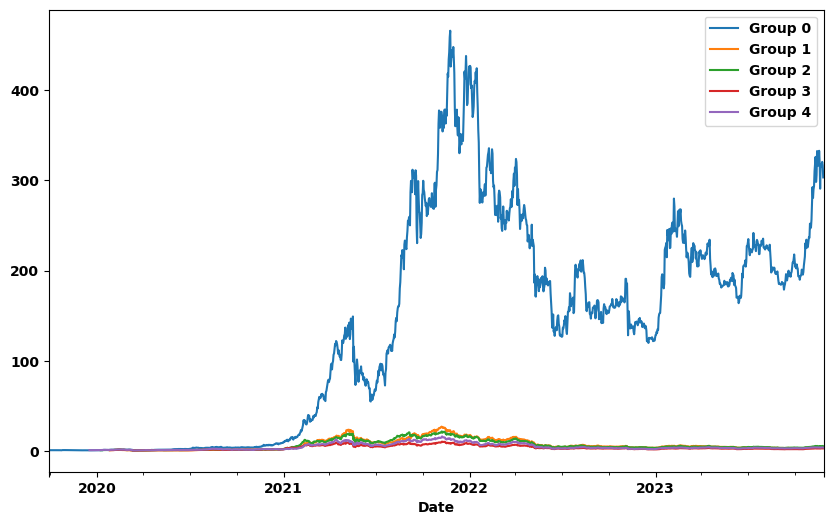

In [22]:
plt.figure(figsize=(10,6))
for i in range(5):
    groupdfs[float(i)][f'CumulativeReturn_{float(i)}'].plot(label=f'Group {i}')
plt.legend()    


In [23]:
# 多空回测
# Long-Short Backtesting
df_longshort = pd.merge(groupdfs[float(0)],groupdfs[float(4)],left_index=True, right_index=True, how='outer').fillna(0)
df_longshort['LSDailyReturn'] = df_longshort['DailyReturn_0.0']-df_longshort['DailyReturn_4.0']
df_longshort['LSCumulativeReturn'] = (1+df_longshort['LSDailyReturn']).cumprod()
df_longshort = df_longshort[['DailyReturn_0.0','DailyReturn_4.0','LSDailyReturn','LSCumulativeReturn']]
df_longshort

,DailyReturn_0.0,DailyReturn_4.0,LSDailyReturn,LSCumulativeReturn
Date,,,,
2019-09-28,-0.018720,0.000000,-0.018720,0.981280
2019-09-29,0.030326,0.000000,0.030326,1.011038
2019-09-30,0.000502,0.000000,0.000502,1.011546
2019-10-01,0.007496,0.000000,0.007496,1.019128
2019-10-02,-0.015789,0.000000,-0.015789,1.003037
...,...,...,...,...
2023-11-23,0.009114,0.016412,-0.007298,36.305126
2023-11-24,0.007473,0.020699,-0.013226,35.824955
2023-11-25,-0.012206,-0.017184,0.004978,36.003288


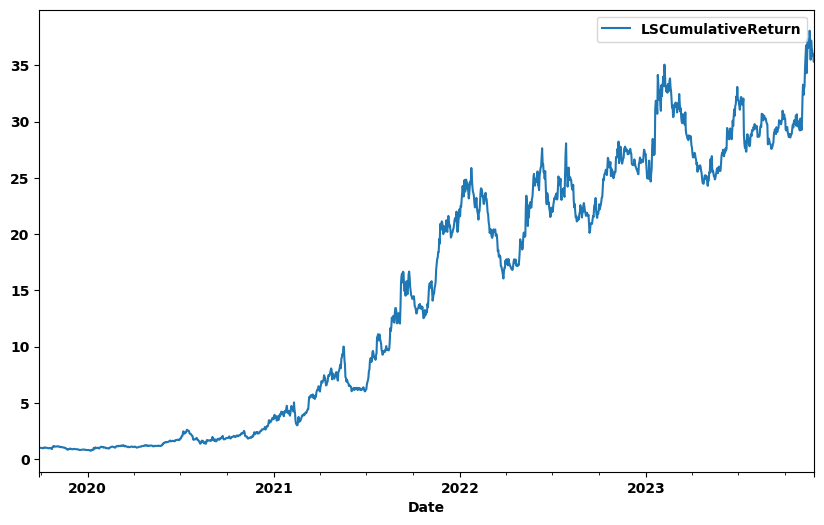

In [24]:
plt.figure(figsize=(10,6))
df_longshort['LSCumulativeReturn'].plot()
# groupdfs[0.0][f'CumulativeReturn_{0.0}'].plot()
# groupdfs[4.0][f'CumulativeReturn_{4.0}'].plot()
plt.legend()

In [25]:
def annulized_sharpe(returns,N=365):
    return np.sqrt(N)*returns.mean()/returns.std()
def calculate_recovery_times(drawdown_series):
    recovery_times = []
    drawdown_start = None
    for i in range(1, len(drawdown_series)):
        if drawdown_series[i-1] < 0 and drawdown_series[i] >= 0:
            if drawdown_start is not None:
                recovery_times.append(i - drawdown_start)
            drawdown_start = None
        elif drawdown_series[i] < 0 and drawdown_start is None:
            drawdown_start = i
    return pd.Series(recovery_times)
AnnulizedSharpe = annulized_sharpe(df_longshort['LSDailyReturn'])
AnnulizedReturn = ((1 + df_longshort['LSDailyReturn']).prod()**(365 / (len(df_longshort) - period))) - 1
df_longshort[f'Drawdown_{period}'] = df_longshort['LSCumulativeReturn']/df_longshort['LSCumulativeReturn'].cummax() - 1
max_drawdown = df_longshort[f'Drawdown_{period}'].min()
m = pd.DataFrame()
m['RecoveryTime'] = calculate_recovery_times(df_longshort[f'Drawdown_{period}'])
mean_recovery_time = m['RecoveryTime'].mean()
calmar = AnnulizedReturn/abs(max_drawdown)
print(f"Sharpe Ratio 夏普比率: {round(AnnulizedSharpe,2)} (Annualized年化)")
print(f"Annualized Return 年化回报率: {round(AnnulizedReturn,2)}")
print(f"Max Drawdown 最大回撤: {round(max_drawdown,2)}")
print(f"Mean Recovery Time 平均回撤修复时间: {round(mean_recovery_time,2)}")
print(f"Calmar Ratio 卡尔玛比率: {round(calmar,2)}")

Sharpe Ratio 夏普比率: 1.62 (Annualized年化)
Annualized Return 年化回报率: 1.38
Max Drawdown 最大回撤: -0.48
Mean Recovery Time 平均回撤修复时间: 19.66
Calmar Ratio 卡尔玛比率: 2.88


### 因子IC/IR值检验
### Information Coefficient & Information Ratio Check

In [26]:
from scipy.stats import spearmanr
import warnings

# Ignore all runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

test_group = crypto_concat.groupby(['Date'])
IC = pd.DataFrame(columns=['Date','RankIC','NormIC'])
for time,df in test_group:
    rankIC,_ = spearmanr(df[['MomentumFactorRank','DailyReturnRank']])
    normIC = df['MomentumFactor'].corr(df['DailyReturn'])
    IC.loc[len(IC)] = [time[0], rankIC, normIC]
IC.set_index('Date',inplace=True)
IC = IC.dropna()
IC

,RankIC,NormIC
Date,,
2019-12-17 00:00:00,1.000000,1.000000
2019-12-18 00:00:00,1.000000,1.000000
2020-03-05 00:00:00,-0.340659,-0.357038
2020-03-06 00:00:00,0.054945,-0.037613
2020-03-07 00:00:00,0.060440,0.500591
...,...,...
2023-11-22 00:00:00,-0.239216,-0.283644
2023-11-23 00:00:00,-0.150700,-0.014079
2023-11-24 00:00:00,-0.139496,-0.137307


In [27]:
RankIC = IC['RankIC'].mean()
NormIC = IC['NormIC'].mean()
RankIR = IC['RankIC'].mean()/IC['RankIC'].std()
NormIR = IC['NormIC'].mean()/IC['NormIC'].std()
print(f"Rank IC Mean: {RankIC}")
print(f"Norm IC Mean: {NormIC}")
print(f"Rank IC Information Ratio: {RankIR}")
print(f"Norm IC Information Ratio: {NormIR}")

Rank IC Mean: -0.023669122477343305
Norm IC Mean: 0.01909903504811035
Rank IC Information Ratio: -0.08542742500738874
Norm IC Information Ratio: 0.05672373050293427


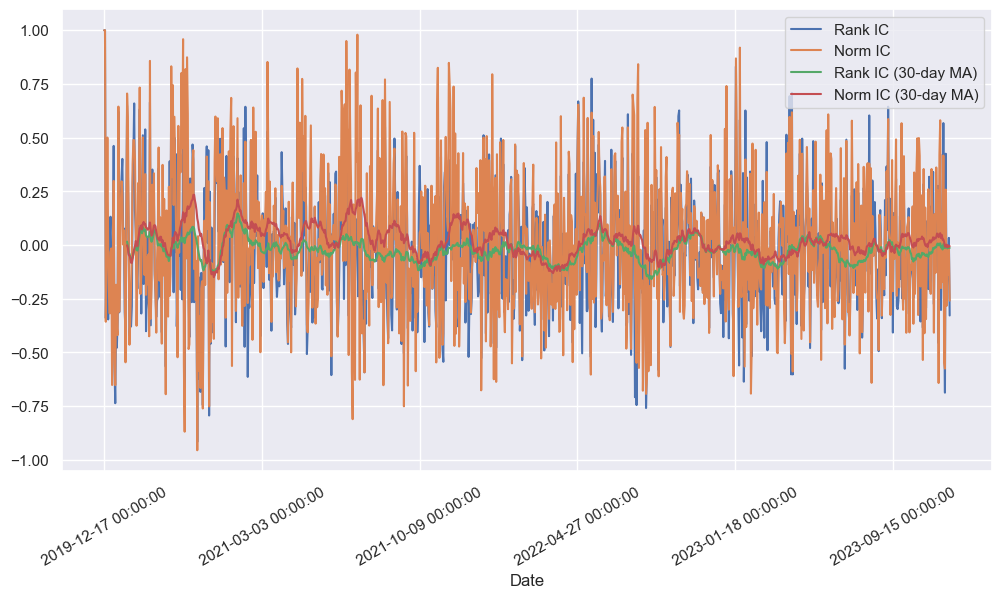

In [28]:
import seaborn as sns

sns.set_theme()
plt.figure(figsize=(12, 6))
IC['RankIC'].plot(label='Rank IC')
IC['NormIC'].plot(label='Norm IC')
IC['RankIC_MA'] = IC['RankIC'].rolling(window=30).mean()
IC['NormIC_MA'] = IC['NormIC'].rolling(window=30).mean()

IC['RankIC_MA'].plot(label='Rank IC (30-day MA)')
IC['NormIC_MA'].plot(label='Norm IC (30-day MA)')
plt.xticks(rotation=30)
plt.legend()
plt.show()